# NBA Stats

This analysis compares the performance of the 2010 and 2014 seasons for the New York Knicks and the Brooklyn Nets.


In [1]:
import numpy as np
import pandas as pd
from scipy.stats import pearsonr, chi2_contingency
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
np.set_printoptions(suppress=True, precision = 2)

nba = pd.read_csv('./nba_stats.csv')

# Subset Data to 2010 Season, 2014 Season
nba_2010 = nba[nba.year_id == 2010]
nba_2014 = nba[nba.year_id == 2014]

display(nba_2010.head())
display(nba_2014.head())

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,...,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes
111032,55517,200910270CLE,NBA,1,2010,10/27/2009,1,0,BOS,Celtics,...,53.780228,CLE,Cavaliers,89,1682.4541,1669.5657,A,W,0.277472,NaN
111033,55517,200910270CLE,NBA,0,2010,10/27/2009,1,0,CLE,Cavaliers,...,57.480888,BOS,Celtics,95,1616.2000,1629.0884,H,L,0.722528,NaN
111034,55518,200910270DAL,NBA,1,2010,10/27/2009,1,0,WAS,Wizards,...,29.191736,DAL,Mavericks,91,1586.4293,1560.6396,A,W,0.133436,NaN
111035,55518,200910270DAL,NBA,0,2010,10/27/2009,1,0,DAL,Mavericks,...,46.996815,WAS,Wizards,102,1361.4187,1387.2084,H,L,0.866564,NaN
111036,55519,200910270LAL,NBA,1,2010,10/27/2009,1,0,LAC,Clippers,...,22.856619,LAL,Lakers,99,1718.7451,1719.3817,A,L,0.052993,NaN


,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,...,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes
121054,60528,201310290IND,NBA,1,2014,10/29/2013,1,0,ORL,Magic,...,22.266760,IND,Pacers,97,1583.5721,1585.2700,A,L,0.106039,NaN
121055,60528,201310290IND,NBA,0,2014,10/29/2013,1,0,IND,Pacers,...,49.365368,ORL,Magic,87,1313.2317,1311.5338,H,W,0.893961,NaN
121056,60529,201310290LAL,NBA,0,2014,10/29/2013,1,0,LAL,Lakers,...,42.866776,LAC,Clippers,103,1586.5884,1575.4142,H,W,0.535102,NaN
121057,60529,201310290LAL,NBA,1,2014,10/29/2013,1,0,LAC,Clippers,...,48.369659,LAL,Lakers,116,1511.0200,1522.1942,A,L,0.464898,NaN
121058,60530,201310290MIA,NBA,1,2014,10/29/2013,1,0,CHI,Bulls,...,42.281761,MIA,Heat,107,1691.8896,1695.1932,A,L,0.172841,NaN


In [29]:
#Isolates the column containing points scored for the Knicks in 2010
knicks_pts = nba_2010.pts[nba.fran_id=='Knicks']
#Isolates the column containing points scored for the Nets in 2010
nets_pts = nba_2010.pts[nba.fran_id=='Nets']

#Points scored per game for the Knicks
knicks_mean_score = np.mean(knicks_pts)
#Points scored per game for the Nets
nets_mean_score = np.mean(nets_pts)

#The difference in mean scores
diff_means_2010 = knicks_mean_score - nets_mean_score
print(round(diff_means_2010, 2))

9.73


Here we see that the Knicks scored 9.73 more points per game than the Nets in 2010

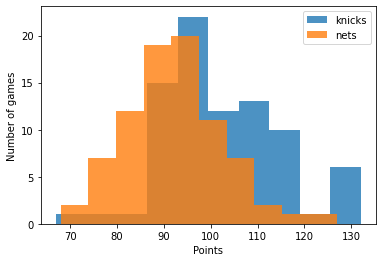

In [11]:
""""The following histogram represents the distribution of
games in which each team scored a given point total """"

plt.hist(knicks_pts, alpha=0.8, label='Knicks')
plt.hist(nets_pts, alpha=0.8,  label='Nets')
plt.legend()
plt.xlabel('Points')
plt.ylabel('Number of games')
plt.show()

In [30]:
#Isolates the column containing points scored for the Knicks in 2014
knicks_pts2 = nba_2014.pts[nba.fran_id=='Knicks']
#Isolates the column containing points scored for the Knicks in 2014
nets_pts2 = nba_2014.pts[nba.fran_id=='Nets']

#Points scored per game for the Knicks
knicks_mean_score2 = np.mean(knicks_pts2)
#Points scored per game for the Nets
nets_mean_score2 = np.mean(nets_pts2)

#The difference in mean scores
diff_means_2014 = knicks_mean_score2 - nets_mean_score2
print(round(diff_means_2014, 2))

0.45


The mean difference was much closer in 2014, with the Knicks scoring less than
a point more than the Nets

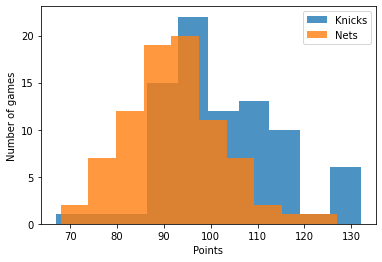

In [26]:
plt.hist(knicks_pts, alpha=0.8, label='Knicks')
plt.hist(nets_pts, alpha=0.8,  label='Nets')
plt.legend()
plt.xlabel('Points')
plt.ylabel('Number of games')
plt.show()

In [32]:
#Here we evaluate the effect of playing at home or away on winning by frequency and then proportionally
location_result_freq = pd.crosstab(nba_2010.game_result, nba_2010.game_location)
print(location_result_freq)

location_result_proportions = pd.crosstab(nba_2010.game_result, nba_2010.game_location)/len(location_result_freq)
print(location_result_proportions)

game_location    A    H
game_result            
L              786  526
W              526  786
game_location      A      H
game_result                
L              393.0  263.0
W              263.0  393.0


As expected, the results show that a team playing at home is more likely to win

In [33]:
chi2, pval, dof, expected = chi2_contingency(location_result_proportions)
print(expected) #Expresses the expected frequencies for the table
print(round(chi2, 2)) #The Chi-square test to determine confidence

[[328. 328.]
 [328. 328.]]
50.73


The Chi-square result of 50.73 illustrates a strong confidence in our analyses